# capcomm
##### A program to specify polygon or multipolygon shape and infer ecological community structure within based on species occurrence records.

In [2]:
import pandas as pd
import geopandas
import requests
import matplotlib.pyplot as plt
import capcomm

## Read in shapefile data

<AxesSubplot:>

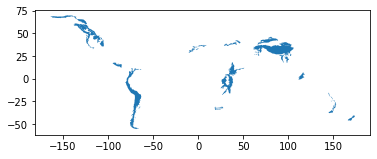

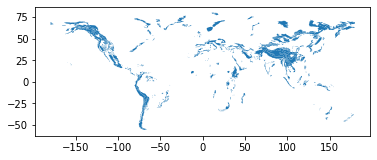

In [3]:
# "large-scale set" of mountain polygons (17 polygons represent largest continuous mountain ranges)
large = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_supplementary_large-scale-set/GMBA mountain inventory_V1.2-LargeScale.shp")
large.plot()

# Mountain polygons for "entire_world" (1,048 polygons)
world = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_entire_world/GMBA Mountain Inventory_v1.2-World.shp")
world[world.Country == "United States of America"]
world.plot()

In [ ]:
# Mountain polygons by mega-region
africa = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_mega-region/GMBA Mountain Inventory_v1.2-Africa.shp")
africa.plot()

asia = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_mega-region/GMBA Mountain Inventory_v1.2-Asia.shp")
asia.plot()

australia = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_mega-region/GMBA Mountain Inventory_v1.2-Australia.shp")
australia.plot()

europe = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_mega-region/GMBA Mountain Inventory_v1.2-Europe.shp")
europe.plot()

greenland = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_mega-region/GMBA Mountain Inventory_v1.2-Greenland.shp")
greenland.plot()

n_america = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_mega-region/GMBA Mountain Inventory_v1.2-NorthAmerica.shp")
n_america.plot()

oceania = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_mega-region/GMBA Mountain Inventory_v1.2-Oceania.shp")
oceania.plot()

s_america = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_mega-region/GMBA Mountain Inventory_v1.2-SouthAmerica.shp")
s_america.plot()

## Classes

In [4]:
class Data:
    """
    TODO:
    """
    def __init__(self, dataframe):       
        self.polygons = [
            Polygon(name, poly) for name, poly in [
                dataframe.iloc[i][["Name", "geometry"]]
                for i in range(len(dataframe))]
        ]
        
    def draw(self, index):
        """
        TODO...
        """
        print(self.polygons[index].name)
        self.polygons[index].polygon

In [7]:
l = Data(large)

Cordillera de los Andes


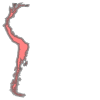

In [8]:
print(l.polygons[9].name)
l.polygons[9].polygon

In [9]:
# how to get this to draw polygon like above that is printed to stdout
l.draw(9)

Cordillera de los Andes


In [6]:
class Polygon:
    """
    Polygon holds shape information for plotting a polygon, and a
    dataframe of points inside that polygon, and ...

    Parameters:
    -----------
    name:
    polygon: geojson polygon format object.
    """
    def __init__(self, name, polygon):
        self.name = name
        self.polygon = polygon

    def get_occurrences_in_polygon(self, taxa=6):
        """
        query GBIF for occurrence records within polygon and return
        as JSON
        """
        res = requests.get(
            url="https://api.gbif.org/v1/occurrence/search/",
            params={
                "kingdomKey": taxa,
                "geometry": self.polygon,
                "hasCoordinate": "true",
                "offset": 0,
                "limit": 100,
               }
            )
        return res.json()
        print(res.json()["count"], "occurrences available for this polygon")

    def convert_json_to_dataframe(self, json):
        """
        json = get_occurrences_in_polygon()
        """

        #convert res.json() to pandas df
        df = pd.json_normalize(json)

        #filter df to include only species, latitude, longitude. 2 possible ways.
        #visit https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
        #for further ways/explanations on how to organize dataframes to your liking!

        #1 - organize by column name
        newDf = df[['species', 'longitude', 'latitude']]

        #2 - organize by column position (the bottom examples include columns 0 & 1)
        #newDf = df.iloc[:, 0:2] or
        #newDf = df.iloc[0, 0:2].copy() To avoid the case where changing df1 also changes df

        return newDf

    def plot_with_mpl(self, df):
        """
        I could not test this code to know if it works or not but it was taken
        from the documentation here which I think would be helpful for you! It
        specifically talks about longitude and latitude. Hopefully this code
        ends up working or helps!
        https://geopandas.org/gallery/create_geopandas_from_pandas.html
        """
        gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

        #visualize to make sure df is ok
        print(gdf.head())

        #get mountain area
        mtn = geopandas.read_file("Users/liortal/hacks/capcomm/data/GMBA_mountain_inventory_V1.2_entire_world/GMBA_Mountain_Inventory_v1.2-World.shp")

        #restrict to species?
        ax = mtn[mtn.species == 'groenlandica'].plot(color='white', edgecolor='black')

        # We can now plot our GeoDataFrame
        gdf.plot(ax=ax, color='red')
        plt.show()

    def convert_shape(self):
        """
        convert shapefile formats (e.g., .shp file to .geojson)
        """
        self.to_file("{self}.geojson", driver='GeoJSON')

In [ ]:
if __name__ == "__main__":

    # get example polygon (load with geopandas from ...)
    example_poly = "..."

    # create example Polygon object
    pol = Polygon(name="test", polygon=example_poly)
    print(pol)

    # get json records from
    r = pol.get_occurrences_in_polygon(taxa=6)

    #convert to df and filter
    df = pol.convert_json_to_dataframe(r)

    #plot
    pol.plot_with_mpl(df)

# UX

In [ ]:
# Read in polygons
world = geopandas.read_file("../data/GMBA_mountain_inventory_V1.2_entire_world/GMBA Mountain Inventory_v1.2-World.shp")
world[world.Country == "United States of America"]

### select Polygon class object stored within Data class object

Andes fueginos


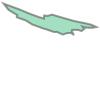

In [268]:
w = Data(world)
print(w.polygons[0].name)
w.polygons[0].polygon

Andes fueginos


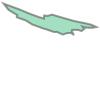

In [269]:
andes = w.polygons[0]
print(andes.name)
andes.polygon
#andes.get_occurrences_in_polygon()

### explicit use of Polygon class object

In [ ]:
alaska = Polygon(name = "alaska", polygon = mountains.geometry[mountains.Name=="Alaska Range"])
alaska.get_occurrences_in_polygon()

In [285]:
def get_occurrences_in_polygon(geometry, taxa=6):
    """
    query GBIF for occurrence records within polygon and return
    as JSON
    """
    res = requests.get(
        url="https://api.gbif.org/v1/occurrence/search/",
        params={
            "kingdomKey": taxa,
            "geometry": geometry,
            "hasCoordinate": "true",
            "offset": 0,
            "limit": 10,
        }
    )
    return res.json()
    print(res.json()["count"], "occurrences available for this polygon")

In [286]:
json = get_occurrences_in_polygon(geometry = world.geometry[0])

In [289]:
json

{'offset': 0,
 'limit': 10,
 'endOfRecords': False,
 'count': 12603,
 'results': [{'key': 3031584233,
   'datasetKey': '50c9509d-22c7-4a22-a47d-8c48425ef4a7',
   'publishingOrgKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'installationKey': '997448a8-f762-11e1-a439-00145eb45e9a',
   'publishingCountry': 'US',
   'protocol': 'DWC_ARCHIVE',
   'lastCrawled': '2021-03-14T05:08:17.784+00:00',
   'lastParsed': '2021-03-14T07:11:14.357+00:00',
   'crawlId': 255,
   'hostingOrganizationKey': '28eb1a3f-1c15-4a95-931a-4af90ecb574d',
   'extensions': {'http://rs.gbif.org/terms/1.0/Multimedia': [{'http://purl.org/dc/terms/format': 'image/jpeg',
      'http://purl.org/dc/terms/license': 'http://creativecommons.org/licenses/by-nc/4.0/',
      'http://purl.org/dc/terms/created': '2021-01-07T20:33:51-08:00',
      'http://purl.org/dc/terms/rightsHolder': 'María Regina Silva',
      'http://purl.org/dc/terms/type': 'StillImage',
      'http://rs.tdwg.org/dwc/terms/catalogNumber': '109554667',
     